#                                             Census Income
### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [72]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [74]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [75]:
len(df.columns)

15

In [76]:
df.shape

(32560, 15)

In [77]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='Income', ylabel='count'>

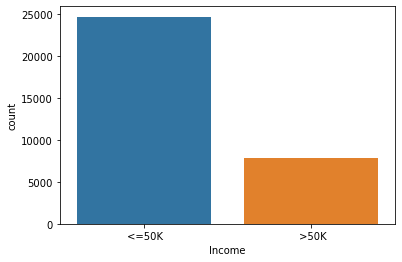

In [78]:
sns.countplot(x = 'Income',data=df)

In [79]:
df["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [80]:
print(f"<=50k : {round(24720 /32561 * 100, 2)}")
print(f"> 50k : {round(7841 /32561 * 100, 2)}")

<=50k : 75.92
> 50k : 24.08


# EDA

In [81]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [82]:
numerical = [i for i in df.columns if df[i].dtypes != "O"]

In [83]:
numerical

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [84]:
for i in numerical:
    print(f" {i}  :  {len(df[i].unique())}")

 Age  :  73
 Fnlwgt  :  21647
 Education_num  :  16
 Capital_gain  :  119
 Capital_loss  :  92
 Hours_per_week  :  94


In [85]:
df["Education_num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

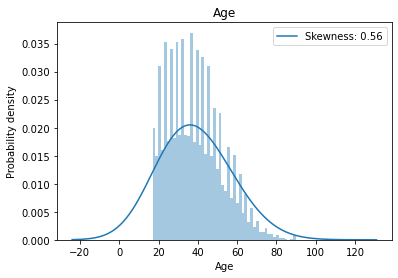

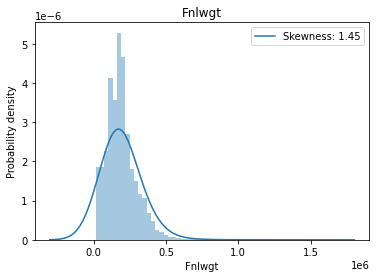

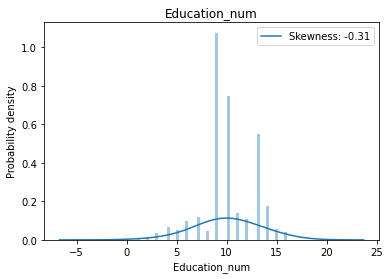

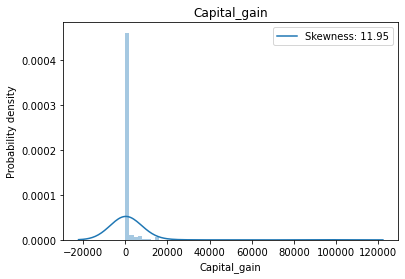

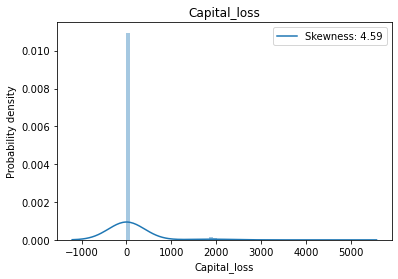

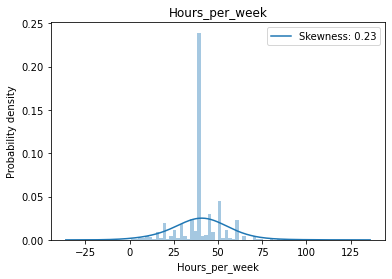

In [86]:
for feature in numerical:
    bar = sns.distplot(df[feature], kde_kws = {'bw':1})
    bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

In [87]:
df["Age"] = np.log(df["Age"])
df["Fnlwgt"] = np.log(df["Fnlwgt"])

In [88]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### Handle Categry data

In [89]:
categorical = [i for i in df.columns if df[i].dtypes =="O"]

In [90]:
for feature in categorical:
    print(f" {feature} : {len(df[feature].unique())}")

 Workclass : 9
 Education : 16
 Marital_status : 7
 Occupation : 15
 Relationship : 6
 Race : 5
 Sex : 2
 Native_country : 42
 Income : 2


In [91]:
for feature in categorical:
    print(df[feature].value_counts())
    print("\n \n ")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

 
 
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

 
 
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

 
 
 Prof-specialty       4140
 Craft-repair         4099
 

### Handling Missing Values in category data

In [92]:
print(f"Workclass : {round(2093 / 32561 , 4) *100}%")
print(f"Occupation : {round(1843 / 32561 , 4) *100}%")
print(f"Native_country : {round(583 / 32561 , 4) *100}%")

Workclass : 6.43%
Occupation : 5.66%
Native_country : 1.79%


In [93]:
df["Workclass"].mode()[0]

' Private'

In [94]:
#There is 6 percent missing values so we can fill it with mode value
df["Workclass"] = df['Workclass'].str.replace('?','Private')
df["Occupation"] = df['Occupation'].str.replace('?','Prof-specialty')
df["Native_country"] = df['Native_country'].str.replace('?','United-States')

In [95]:
#Education Category
df["Education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th','9th','10th','11th', '12th'],'school', inplace = True ,regex = True)
df["Education"].replace(['Assoc-voc','Assoc-acdm','Prof-school', 'Some-college'], 'higher', inplace = True, regex = True)

In [96]:
#Matrial status
df['Marital_status'].replace(['Mrried-civ-spouse', 'Married-AF-spouse'], 'Married', inplace = True , regex = True)
df['Marital_status'].replace(['Divorced', 'Seprated','Widowed','Married-spouse-absent'], 'other', inplace = True , regex = True)

In [97]:
#Income
df["Income"] = df["Income"].replace({'<=50k' : 0 , ">50k" : 1 }, regex = True)

In [98]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.912023,Self-emp-not-inc,11.330336,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,3.637586,Private,12.281393,HS-grad,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,3.970292,Private,12.366153,school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3.332205,Private,12.732011,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,3.610918,Private,12.558777,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [99]:
for feature in categorical:
    print(f" {feature} : {len(df[feature].unique())}")

 Workclass : 8
 Education : 6
 Marital_status : 5
 Occupation : 14
 Relationship : 6
 Race : 5
 Sex : 2
 Native_country : 41
 Income : 2


In [100]:
df["Education"].unique()

array([' Bachelors', ' HS-grad', ' school', ' Masters', ' higher',
       ' Doctorate'], dtype=object)

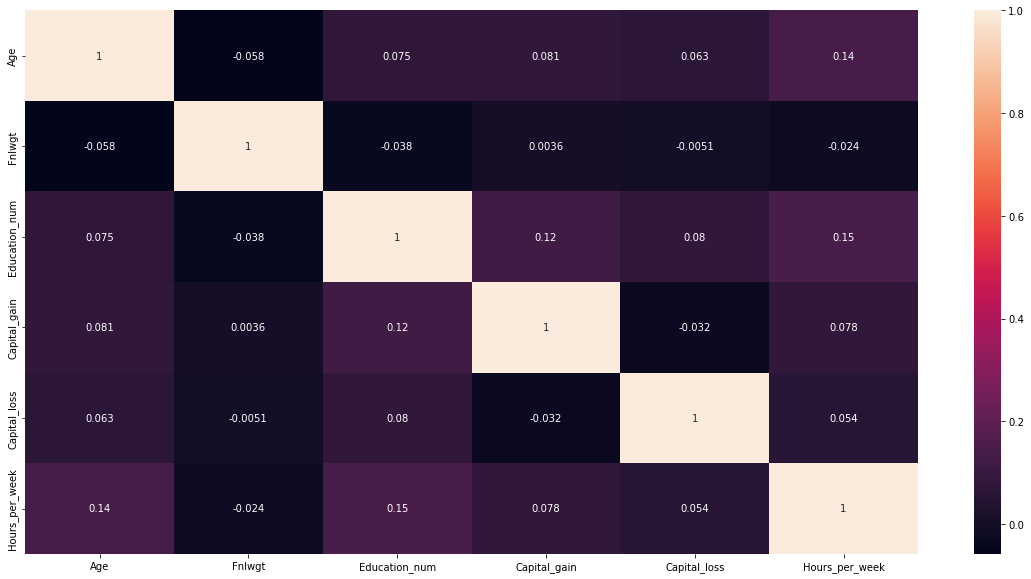

In [101]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True);

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2925,0,12,1,3,0,4,1,0,0,12,38,0
1,21,3,14085,2,8,4,5,1,4,1,0,0,39,38,0
2,36,3,15335,5,6,1,5,0,2,1,0,0,39,38,0
3,11,3,19354,0,12,1,9,5,2,0,0,0,39,4,0
4,20,3,17699,3,13,1,3,5,4,0,0,0,39,38,0


In [104]:
x_train = df.iloc[:,:-1]
y_train = df["Income"]

In [105]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
x = df.values 

X=df.iloc[:,:-1].values
# normalize
X = StandardScaler().fit_transform(X)
y=df.iloc[:,-1].values

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(penalty='l2')
model.fit(X_train,y_train)

predict = model.predict(X_test)
model.score(X_test,y_test)

0.8349201474201474

In [108]:
from sklearn.metrics import classification_report,precision_recall_fscore_support

print("Model's Accuracy values       :",model.score(X_test,y_test))
print("Model's Test  f1_score  :",f1_score(y_test,predict),"\n")

print(classification_report(y_test,predict),"\n")

metrics =precision_recall_fscore_support(y_test,predict)

print("Precision:",metrics[0])
print("Recall   :",metrics[1])
print("F1 Skoru :",metrics[2])

Model's Accuracy values       : 0.8349201474201474
Model's Test  f1_score  : 0.5929572131768269 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4957
           1       0.72      0.50      0.59      1555

    accuracy                           0.83      6512
   macro avg       0.79      0.72      0.74      6512
weighted avg       0.83      0.83      0.82      6512
 

Precision: [0.85772208 0.72099448]
Recall   : [0.93887432 0.50353698]
F1 Skoru : [0.89646538 0.59295721]


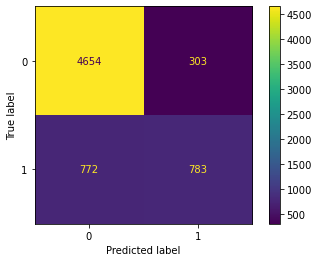

In [110]:
#ploting confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [111]:
df_u=df.copy()

In [112]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [113]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [116]:
km2 = KMeans(n_clusters = 2)

y_predicted2=km2.fit_predict(df[['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status', 'Occupation',
                               'Relationship', 'Race','Sex', 'Capital_gain','Capital_loss','Hours_per_week','Native_country']])
y_predicted2

array([0, 1, 1, ..., 0, 1, 1])

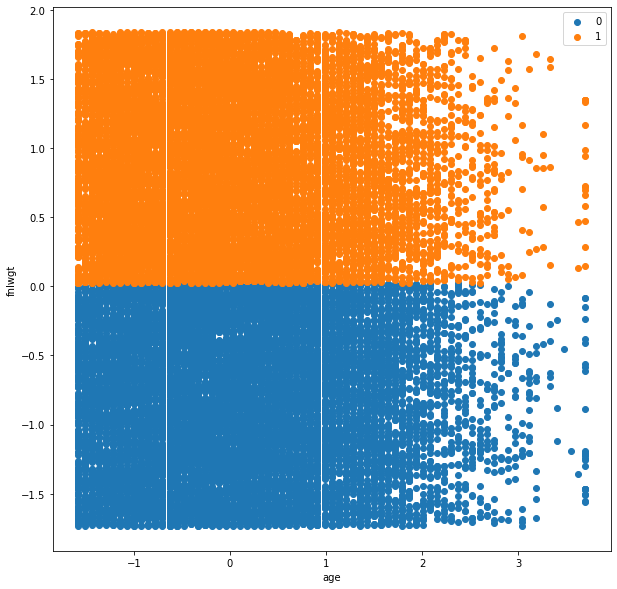

In [117]:
centroids = km2.cluster_centers_
unique_labels = np.unique(y_predicted2)
 
#plotting the results:
plt.figure(figsize=(10,10))

for i in unique_labels:
    plt.scatter(X[y_predicted2 == i , 0] , X[y_predicted2 == i , 2] ,cmap='rainbow' ,label = i)
plt.legend()
plt.xlabel('age')
plt.ylabel('fnlwgt')
plt.show()

In [119]:
# Creating model with 3 Clusters
km3 = KMeans(n_clusters = 3)

y_predicted=km3.fit_predict(df[['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status', 'Occupation',
                               'Relationship', 'Race','Sex', 'Capital_gain','Capital_loss','Hours_per_week','Native_country']])
y_predicted

array([2, 1, 0, ..., 1, 1, 0])

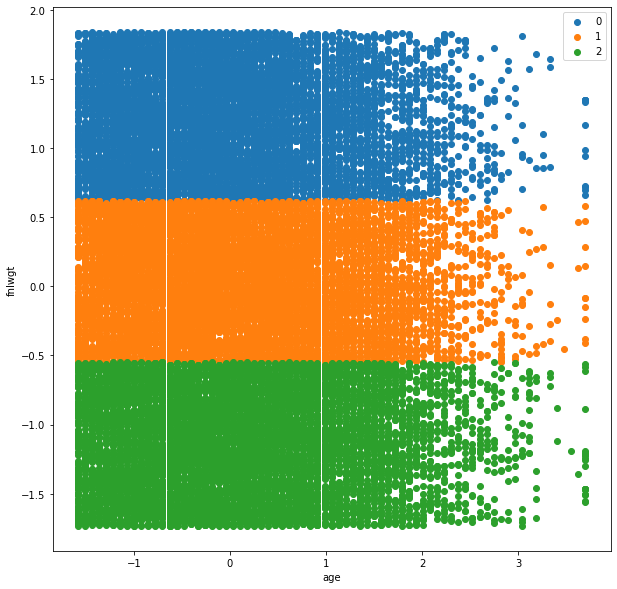

In [120]:
centroids = km3.cluster_centers_
unique_labels = np.unique(y_predicted)
 
#plotting the results:
plt.figure(figsize=(10,10))

for i in unique_labels:
    plt.scatter(X[y_predicted == i , 0] , X[y_predicted == i , 2] ,cmap='rainbow' ,label = i)
# plt.scatter(centroids[:,0] , centroids[:,2] , s = 60, color = 'k' )
plt.legend()
plt.xlabel('age')
plt.ylabel('fnlwgt')
plt.show()

In [121]:
distortions = []
K=range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

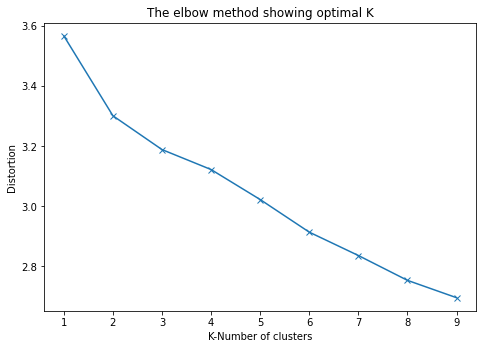

In [122]:
#Plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,25))
ax.set_xlabel('K-Number of clusters')
ax.set_ylabel('Distortion')
ax.set_title('The elbow method showing optimal K')
ax.plot(K,distortions,marker='x')
plt.show()